## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:因为数据之间的关系太过复杂，无法建立一个公式来对数据直接的关系进行描述，机器学习方法能够从大量的数据中自动地学习出规律，具有方便易用的特点。

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:随机选择k和b，效率低，训练时间长，而且不一定能找到最优解。

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:第二种方法比第一种好，第二种随机选择方向，效率不高，有待提升

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:梯度方向是函数变化最快的方向，能够提升学习效率

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:Gredient是梯度的意思，Descent是下降，Gredient Descent就是负梯度方向，在该方向上函数降低的速度最快，训练的效率最高

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:便于计算机实现，而且随着训练次数和训练数据量的增加，其精确度也越来越高。

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:通过对数据进行训练，自动学习出数据之间的规律

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



In [1]:
import requests
import re

In [3]:
import re

In [4]:
import matplotlib.pyplot as plt

In [5]:
import networkx as nx

In [6]:
from collections import defaultdict

### 地铁线路文件

In [7]:
fileName = "北京地铁.html"
text = open(fileName,'r',encoding='utf8').read()
#text

### 地铁站信息

In [8]:
#普通车站
regx="<circle [^>]* cx=\"-*(\d+)\" cy=\"(\d+)\" [^>]* sdata=\"(\w+)\"></circle>"
pattern = re.compile(regx)
normalStations = pattern.findall(text)
#换乘站
regx="<image [^>]* x=\"(\d+)\" y=\"(\d+.\d+)\" sdata=\"(\w+)\"></image>"
pattern = re.compile(regx)
kernelStations = pattern.findall(text)

stations=normalStations+kernelStations

### 地铁站信息，名称，位置

In [9]:
stationInfo={}

for station in stations:
    x,y,name = station    
    stationInfo[name] = (float(x),-1*float(y))
len(stationInfo),stationInfo

(332,
 {'2号航站楼': (1489.0, -402.0),
  '3号航站楼': (1570.0, -402.0),
  '七里庄': (541.0, -893.0),
  '万安': (380.0, -475.0),
  '万寿路': (533.0, -790.0),
  '万源街': (1151.0, -1084.0),
  '三元桥': (1229.0, -581.0),
  '上地': (757.0, -466.0),
  '上岸': (140.0, -790.0),
  '东单': (1058.0, -783.0),
  '东四': (1058.0, -731.0),
  '东四十条': (1134.0, -698.0),
  '东夏园': (1790.0, -810.0),
  '东大桥': (1181.0, -738.0),
  '东湖渠': (1219.0, -461.0),
  '东直门': (1127.0, -648.0),
  '东风北桥': (1288.0, -637.0),
  '东高地': (980.0, -1053.0),
  '中关村': (628.0, -500.0),
  '中国美术馆': (1000.0, -740.0),
  '丰台东大街': (548.0, -927.0),
  '丰台南路': (548.0, -952.0),
  '丰台科技园': (548.0, -1000.0),
  '丰台站': (611.0, -974.0),
  '临河里': (1687.0, -887.0),
  '义和庄': (833.0, -1187.0),
  '九棵树': (1648.0, -848.0),
  '九龙山': (1281.0, -860.0),
  '五棵松': (488.0, -790.0),
  '五福堂': (1032.0, -1105.0),
  '五道口': (757.0, -502.0),
  '亦庄文化园': (1134.0, -1067.0),
  '亦庄桥': (1118.0, -1052.0),
  '亦庄火车站': (1382.0, -1128.0),
  '亮马桥': (1236.0, -628.0),
  '人民大学': (628.0, -587.0),
  '什刹海': (950.0,

### 所有信息，地铁线路，地铁站

In [10]:
#lineRegx="<(image|circle) [^>]* sdata=\"(\w+)\"></(image|circle)>"
lineRegx="<tspan [^>]*>(\w+)</tspan>"
linePattern = re.compile(lineRegx)
linesStation= linePattern.findall(text)
len(linesStation),linesStation

(428,
 ['地铁1号线',
  '地铁1号线',
  '苹果园',
  '古城',
  '八角游乐园',
  '八宝山',
  '玉泉路',
  '五棵松',
  '万寿路',
  '公主坟',
  '军事博物馆',
  '木樨地',
  '南礼士路',
  '复兴门',
  '西单',
  '天安门西',
  '天安门东',
  '王府井',
  '东单',
  '建国门',
  '永安里',
  '国贸',
  '大望路',
  '四惠',
  '四惠东',
  '地铁2号线',
  '西直门',
  '积水潭',
  '鼓楼大街',
  '安定门',
  '雍和宫',
  '东直门',
  '东四十条',
  '朝阳门',
  '建国门',
  '北京站',
  '崇文门',
  '前门',
  '和平门',
  '宣武门',
  '长椿街',
  '复兴门',
  '阜成门',
  '车公庄',
  '地铁4号线',
  '地铁4号线',
  '地铁大兴线',
  '安河桥北',
  '北宫门',
  '西苑',
  '圆明园',
  '北京大学东门',
  '中关村',
  '海淀黄庄',
  '人民大学',
  '魏公村',
  '国家图书馆',
  '动物园',
  '西直门',
  '新街口',
  '平安里',
  '西四',
  '灵境胡同',
  '西单',
  '宣武门',
  '菜市口',
  '陶然亭',
  '北京南站',
  '马家堡',
  '角门西',
  '公益西桥',
  '新宫',
  '西红门',
  '高米店北',
  '高米店南',
  '枣园',
  '清源路',
  '黄村西大街',
  '黄村火车站',
  '义和庄',
  '生物医药基地',
  '天宫院',
  '地铁5号线',
  '地铁5号线',
  '天通苑北',
  '天通苑',
  '天通苑南',
  '立水桥',
  '立水桥南',
  '北苑路北',
  '大屯路东',
  '惠新西街北口',
  '惠新西街南口',
  '和平西桥',
  '和平里北街',
  '雍和宫',
  '北新桥',
  '张自忠路',
  '东四',
  '灯市口',
  '东单',
  '崇文门',
  '磁器口',
  '天坛东门',
  '蒲黄榆',
 

### 地铁站换乘字典

In [11]:
stationDic = defaultdict(list)
lineNameRegx ="\w+线"
preS=""
curS=""
for s in linesStation:
    if not s:continue
    if re.match(lineNameRegx,s):
        preS=""
        curS=""        
    else:
        if s not in stationInfo:
            print(s)
            continue
        preS = curS
        curS = s
        if preS!="" and curS!="":
            stationDic[preS].append(curS)
            stationDic[curS].append(preS)
len(stationDic),stationDic

(332,
 defaultdict(list,
             {'2号航站楼': ['3号航站楼', '三元桥'],
              '3号航站楼': ['三元桥', '2号航站楼'],
              '七里庄': ['丰台东大街', '六里桥', '西局', '大井'],
              '万安': ['植物园', '茶棚'],
              '万寿路': ['五棵松', '公主坟'],
              '万源街': ['亦庄文化园', '荣京东街'],
              '三元桥': ['太阳宫', '亮马桥', '东直门', '3号航站楼', '2号航站楼', '东直门'],
              '上地': ['五道口', '西二旗'],
              '上岸': ['栗园庄', '桥户营'],
              '东单': ['王府井', '建国门', '灯市口', '崇文门'],
              '东四': ['张自忠路', '灯市口', '南锣鼓巷', '朝阳门'],
              '东四十条': ['东直门', '朝阳门'],
              '东夏园': ['郝家府', '潞城'],
              '东大桥': ['朝阳门', '呼家楼'],
              '东湖渠': ['来广营', '望京'],
              '东直门': ['雍和宫', '东四十条', '柳芳', '三元桥', '三元桥'],
              '东风北桥': ['将台', '枣营'],
              '东高地': ['和义', '火箭万源'],
              '中关村': ['北京大学东门', '海淀黄庄'],
              '中国美术馆': ['南锣鼓巷'],
              '丰台东大街': ['丰台南路', '七里庄'],
              '丰台南路': ['科怡路', '丰台东大街'],
              '丰台科技园': ['郭公庄', '科怡路'],
              '丰

In [12]:
stationGraph = nx.Graph()

In [13]:
stationGraph.add_nodes_from(list(stationInfo.keys()))

In [14]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 200 
plt.rcParams['figure.dpi'] = 200 

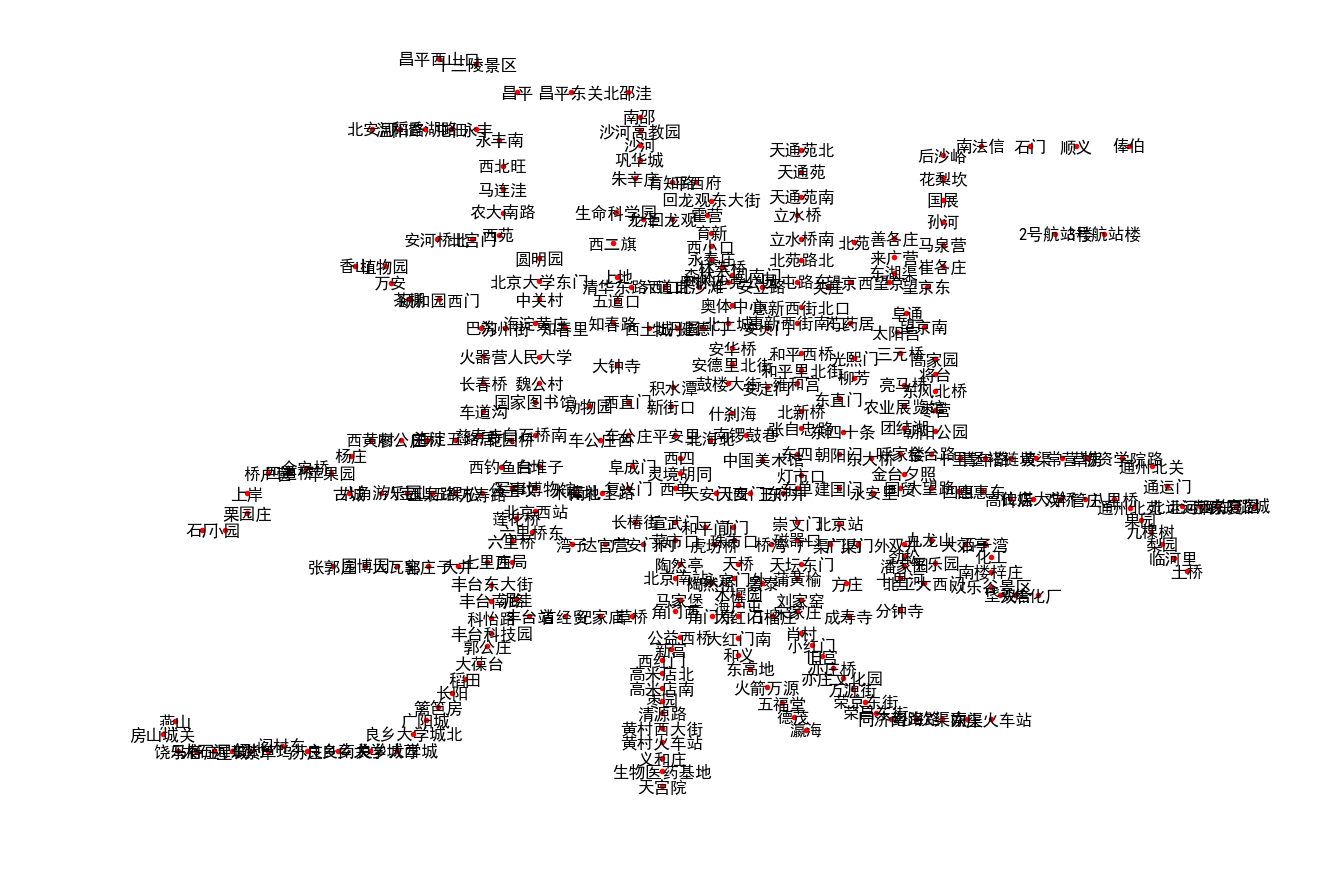

In [15]:
nx.draw(stationGraph,stationInfo,with_labels=True,node_size=1,font_size=6)

### 添加环线

In [16]:
if '西直门' not in stationDic['车公庄']:stationDic['西直门'].append('车公庄')
if '车公庄' not in stationDic['西直门']:stationDic['车公庄'].append('西直门')
if '首经贸' not in stationDic['丰台站']:stationDic['首经贸'].append('丰台站')
if '丰台站' not in stationDic['首经贸']:stationDic['丰台站'].append('首经贸')

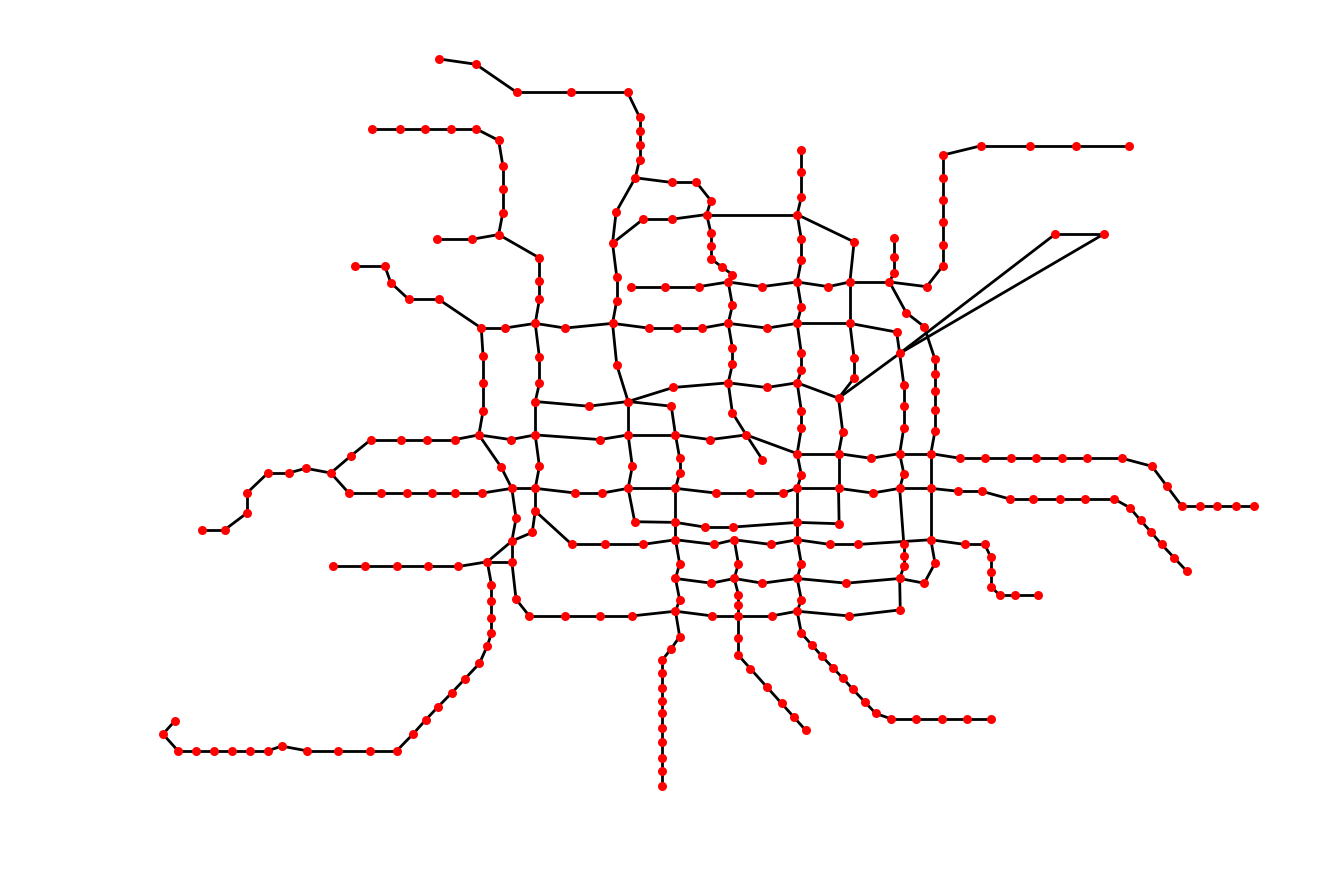

In [17]:
def drawStationLine():
    stationsWithLines = nx.Graph(stationDic)
    nx.draw(stationsWithLines, stationInfo, with_labels=False, node_size=5,font_size=6)
drawStationLine()

#### 最少换乘

In [21]:
def minStations(pathes): 
    return sorted(pathes, key=len)

#### 最短距离

In [22]:
def stationDistance(st1,st2):
    x1,y1 = stationInfo[st1]
    x2,y2 = stationInfo[st2]
    return ((x1-x2)**2+(y1-y1)**2)**0.5
def distance(path):
    if len(path)<2:return 0
    dis = 0
    first = path[0]
    for station in path[1:]:
        second = station
        dis += stationDistance(first,second)
        first = second
    return dis
def minDistance(pathes):
    return sorted(pathes,key=distance)

In [23]:
nx.draw_networkx?

#### 绘制线路图

In [24]:
def drawLines(path,nodeColor='r'):
    pathInfo = defaultdict(list)
    pathDic = defaultdict(list)
    for p in path:
        pathInfo[p] = stationInfo[p]
    f = path[0]
    for p in path[1:]:
        pathDic[p].append(f)
        pathDic[f].append(p)
        f = p
    pathGraph = nx.Graph(pathDic)
    nx.draw(pathGraph, pathInfo, with_labels=True, node_size=5,font_size=6,linewidths=4,node_color=nodeColor)

In [25]:
def search(start, destination, connection_grpah=stationDic, sort_candidate=minDistance):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        #print('pathes:',pathes)
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            #print('new Path',new_path)
            if city == destination: return new_path
        
        visitied.add(froninter)        
        pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制       

In [26]:
import random

最短距离： ['南邵', '沙河高教园', '沙河', '巩华城', '朱辛庄', '育知路', '平西府', '回龙观东大街', '霍营', '育新', '西小口', '永泰庄', '林萃桥', '森林公园南门', '奥林匹克公园', '安立路', '大屯路东', '关庄', '望京西', '芍药居', '太阳宫', '三元桥', '亮马桥', '农业展览馆', '团结湖', '呼家楼', '金台路', '大望路', '四惠', '四惠东', '高碑店'] 
最少车站： ['南邵', '沙河高教园', '沙河', '巩华城', '朱辛庄', '育知路', '平西府', '回龙观东大街', '霍营', '立水桥', '北苑', '望京西', '芍药居', '太阳宫', '三元桥', '亮马桥', '农业展览馆', '团结湖', '呼家楼', '金台路', '大望路', '四惠', '四惠东', '高碑店']


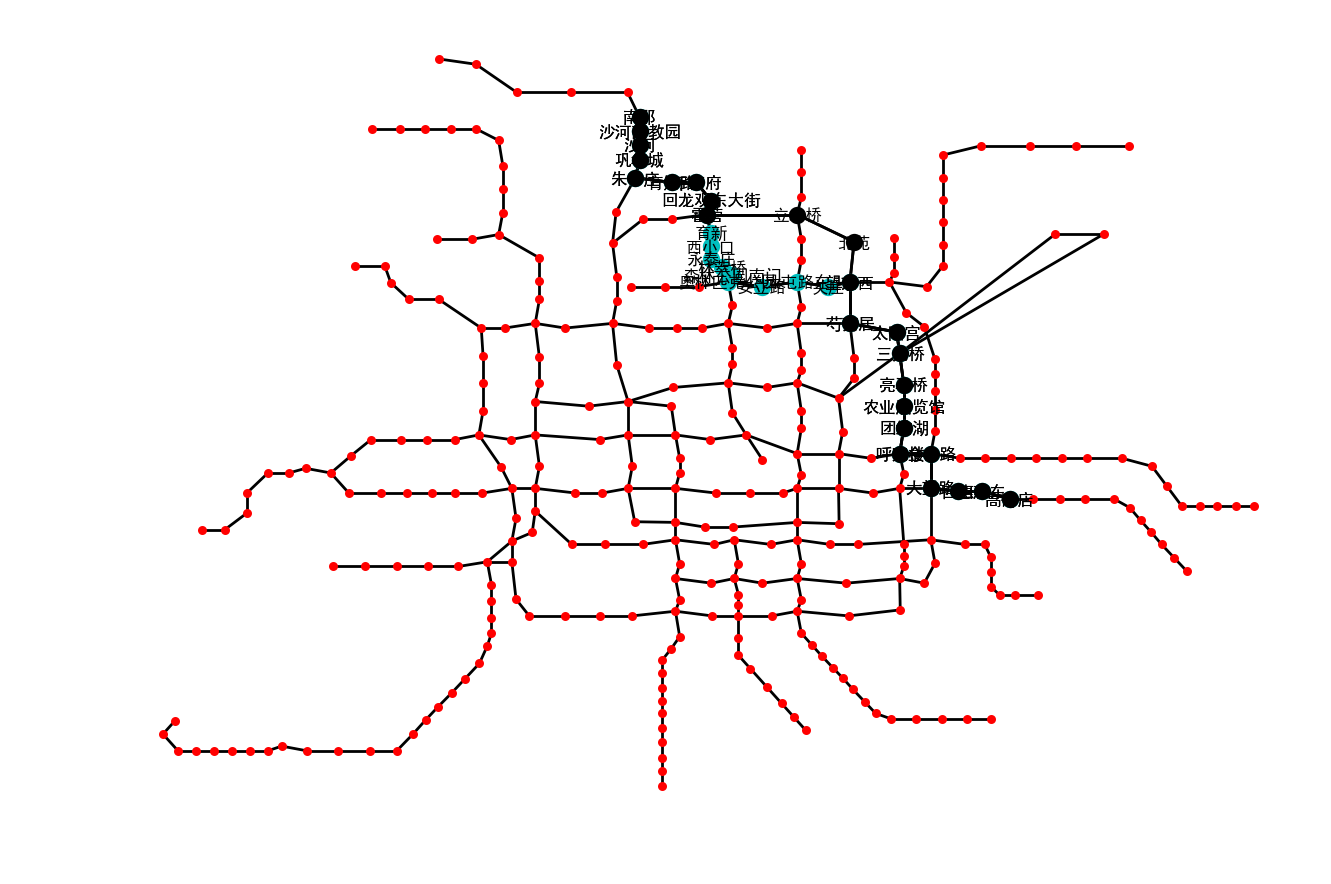

In [27]:
stationNames = list(stationDic.keys())
first = random.choice(stationNames)
second = random.choice(stationNames)
minDis = search(first,second,sort_candidate=minDistance)
minSta = search(first,second,sort_candidate=minStations)
print('最短距离：',minDis,'\n最少车站：',minSta)
drawStationLine()
drawLines(minDis,'c')
drawLines(minSta,'k')

In [28]:
search('平安里', '七里庄', sort_candidate=minDistance)

['平安里',
 '西四',
 '灵境胡同',
 '西单',
 '宣武门',
 '菜市口',
 '广安门内',
 '达官营',
 '湾子',
 '北京西站',
 '六里桥东',
 '六里桥',
 '七里庄']

In [29]:
search('平安里', '七里庄', sort_candidate=minStations)

['平安里', '车公庄', '车公庄西', '白石桥南', '白堆子', '军事博物馆', '公主坟', '莲花桥', '六里桥', '七里庄']

In [32]:
search('奥体中心', '天安门东')

['奥体中心',
 '北土城',
 '安华桥',
 '安德里北街',
 '鼓楼大街',
 '什刹海',
 '南锣鼓巷',
 '东四',
 '灯市口',
 '东单',
 '王府井',
 '天安门东']

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)